In [ ]:
!pip install yfinance


In [19]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define the ticker symbol
ticker_symbol = 'IBM'

# Define the date range
start_date = '2000-01-01'
end_date = '2024-04-01'

# Download historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save data to CSV file in the current working directory
csv_filename = f'{ticker_symbol}_historical_data.csv'
data.to_csv(csv_filename)
print(f"Data downloaded and saved to '{csv_filename}'")

# Load data from the saved CSV file
data = pd.read_csv(csv_filename)

# Preprocessing: Select only the numeric columns (Open, High, Low, Close, Adj Close, Volume)
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Ensure numeric values and handle non-numeric or missing values
data_numeric = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

#ADD THE CODE FROM THE COLAB

# Fill or drop missing values (you can adjust this to fill with a value if needed)
data_numeric = data_numeric.fillna(method='ffill')  # Forward fill missing values
# data_numeric = data_numeric.dropna()  # Drop rows with any missing values (alternative option)

# Normalize the numeric columns using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data_numeric)

#ADD THE CODE FROM THE COLAB


# Function to create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define window size for sequences
window_size = 15

# Create sequences for model training
X, y = create_sequences(data_normalized, window_size)

# Reshape input for the model to have 3 dimensions
X = X.reshape((X.shape[0], X.shape[1], len(numeric_columns)))

# Split data into training and testing sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Shape of X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, y_test: {y_test.shape}")


[*********************100%***********************]  1 of 1 completed

Data downloaded and saved to 'IBM_historical_data.csv'
Shape of X_train: (4868, 15, 6), X_test: (1217, 15, 6)
Shape of y_train: (4868, 6), y_test: (1217, 6)



C:\Users\WIN 10\AppData\Local\Temp\ipykernel_8092\1042612029.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_numeric = data_numeric.fillna(method='ffill')  # Forward fill missing values


In [ ]:
!pip install tensorflow
!pip install keras
from keras.layers import GRU, Dropout, SimpleRNN , Dense
from keras.models import Sequential
gru_model = Sequential()
# First GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True,
input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))
# Second GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(Dropout(0.2))
# Third GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(Dropout(0.2))
# Fourth GRU layer with dropout
gru_model.add(GRU(50))
gru_model.add(Dropout(0.2))
# Output layer
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.summary()

In [ ]:
gru_model.fit(X_train, y_train, epochs=30, batch_size=24, verbose=1)

In [33]:
import matplotlib.pyplot as plt
# Make predictions
predicted_gru = gru_model.predict(X_test)
# Inverse transform the predicted and actual values
predicted_gru = scaler.inverse_transform(predicted_gru)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_gru, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


ValueError: non-broadcastable output operand with shape (1217,1) doesn't match the broadcast shape (1217,6)

[*********************100%***********************]  1 of 1 completed

NaNs in X_train: 0
NaNs in X_test: 0
NaNs in y_train: 0
NaNs in y_test: 0



C:\Users\WIN 10\AppData\Local\Temp\ipykernel_9832\1051061647.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_numeric = data[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(method='ffill')
D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 50)             │         8,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,751 (34.18 KB)

 Trainable params: 8,751 (34.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0365
Epoch 2/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9342e-04
Epoch 3/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5154e-04
Epoch 4/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3280e-04
Epoch 5/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0327e-04
Epoch 6/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8727e-04
Epoch 7/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8228e-04
Epoch 8/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9437e-04
Epoch 9/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7864e-04
Epoch 10/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7335e-04
Epoch 11/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7935e-04
Epoch 12/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7221e-04
Epoch 13/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7732e-04
Epoch 14/30
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6097e-04
Epoch

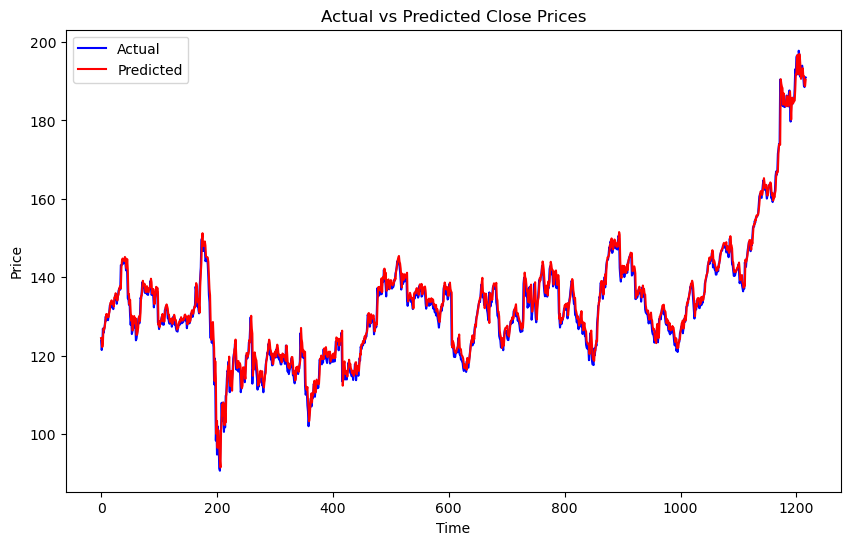

First few predicted values: [124.45780338 124.51660838 122.17549092 123.06803451 126.90363962
 126.61111671 127.04709615 128.30495334 129.44970217 130.58583701]
First few actual values: [123.87189484 121.40535736 122.62906647 126.85468292 125.7074585
 126.40535736 127.44741821 128.81452942 129.97131348 128.93881226]


In [3]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import GRU, Dense
from keras.models import Sequential
from keras.optimizers import Adam

# Define the ticker symbol and date range
ticker_symbol = 'IBM'
start_date = '2000-01-01'
end_date = '2024-04-01'

# Download historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Load data and select only numeric columns
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_numeric = data[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(method='ffill')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data_numeric)

# Function to create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size][3])  # Target is 'Close' price
    return np.array(X), np.array(y)

# Create sequences for model training
window_size = 15
X, y = create_sequences(data_normalized, window_size)

# Reshape input for the model
X = X.reshape((X.shape[0], X.shape[1], len(numeric_columns)))

# Split into training and testing sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Debug: Check for NaNs in training and testing data
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())

# Simplified Model architecture for testing
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(GRU(50, return_sequences=True)
gru_model.add(Dense(1))
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
gru_model.summary()

# Train the model
gru_model.fit(X_train, y_train, epochs=30, batch_size=24, verbose=1)

# Make predictions
predicted_gru = gru_model.predict(X_test)

# Debug: Check for NaNs in predicted_gru before inverse transform
print("NaNs in predicted_gru before inverse transform:", np.isnan(predicted_gru).sum())

# Inverse transform the predictions
predicted_gru_full = np.zeros((predicted_gru.shape[0], data_normalized.shape[1]))
predicted_gru_full[:, 3] = predicted_gru.flatten()  # Place predictions in the 'Close' price column
predicted_gru = scaler.inverse_transform(predicted_gru_full)[:, 3]

# Inverse transform y_test for comparison
y_test_full = np.zeros((y_test.shape[0], data_normalized.shape[1]))
y_test_full[:, 3] = y_test
y_test_actual = scaler.inverse_transform(y_test_full)[:, 3]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(predicted_gru, label='Predicted', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Debug: Display first few predicted and actual values
print("First few predicted values:", predicted_gru[:10])
print("First few actual values:", y_test_actual[:10])


In [ ]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import GRU, Dropout, Dense
from keras.models import Sequential
from keras.optimizers import Adam

# Define the ticker symbol and date range
ticker_symbol = 'IBM'
start_date = '2000-01-01'
end_date = '2024-04-01'

# Download historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Load data and select only numeric columns
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_numeric = data[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(method='ffill')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data_numeric)

# Function to create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size][3])  # Target is 'Close' price
    return np.array(X), np.array(y)

# Create sequences for model training
window_size = 15
X, y = create_sequences(data_normalized, window_size)

# Reshape input for the model
X = X.reshape((X.shape[0], X.shape[1], len(numeric_columns)))

# Split into training and testing sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Debug: Check for NaNs in training and testing data
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())

# Modified Model with Multiple GRU Layers
gru_model = Sequential()
# First GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))
# Second GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(Dropout(0.2))
# Third GRU layer with dropout
gru_model.add(GRU(50, return_sequences=False))
gru_model.add(Dropout(0.2))
# Output layer
gru_model.add(Dense(1))
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
gru_model.summary()

# Train the model
gru_model.fit(X_train, y_train, epochs=30, batch_size=24, verbose=1)

# Make predictions
predicted_gru = gru_model.predict(X_test)

# Debug: Check for NaNs in predicted_gru before inverse transform
print("NaNs in predicted_gru before inverse transform:", np.isnan(predicted_gru).sum())

# Inverse transform the predictions
predicted_gru_full = np.zeros((predicted_gru.shape[0], data_normalized.shape[1]))
predicted_gru_full[:, 3] = predicted_gru.flatten()  # Place predictions in the 'Close' price column
predicted_gru = scaler.inverse_transform(predicted_gru_full)[:, 3]

# Inverse transform y_test for comparison
y_test_full = np.zeros((y_test.shape[0], data_normalized.shape[1]))
y_test_full[:, 3] = y_test
y_test_actual = scaler.inverse_transform(y_test_full)[:, 3]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(predicted_gru, label='Predicted', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Debug: Display first few predicted and actual values
print("First few predicted values:", predicted_gru[:10])
print("First few actual values:", y_test_actual[:10])


In [13]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LeakyReLU, LSTM
from glob import glob
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, f1_score

# Constants
BATCH_SIZE = 5000
MODEL_SAVE_PATH = r"E:\\fastf1_csv_data\\models\\United States Grand Prix.h5"
NUM_LAPS_TO_PREDICT = 58  # Number of laps to predict
DATA_FOLDER = r"E:\\fastf1_csv_data\\Data\\United States Grand Prix\\Race"

# Fuel & Track Temp Inputs
INITIAL_FUEL_LOAD = 110  # Full F1 race fuel load (kg)
FUEL_BURN_RATE = 1.5  # Estimated fuel loss per lap (kg)
INITIAL_TRACK_TEMP = 35  # Track temperature in Celsius
TEMP_DECREASE_LAPS = 10  # Decrease track temp by 1°C every 10 laps

# **Tire Degradation Parameters**
DEGRADATION_FACTORS = {
    "SOFT": (0.07, 2.0),
    "MEDIUM": (0.05, 1.5),
    "HARD": (0.03, 1.2)
}

# **Load Offline CSV Data**
def load_offline_data():
    all_files = glob(os.path.join(DATA_FOLDER, '*.csv'))
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# **Calculate Tire Degradation**
def calculate_degradation(lap_numbers, compound):
    """Degradation is based on different tire compounds."""
    k1, k2 = DEGRADATION_FACTORS[compound]
    return k1 * np.log(k2 * lap_numbers + 1)

# **Prepare Training Data (For All Drivers & Compounds)**
def prepare_training_data(df):
    df = df.dropna(subset=['LapTime', 'Compound', 'Driver'])
    df['LapTime'] = pd.to_timedelta(df['LapTime']).dt.total_seconds()

    compound_data = {"SOFT": [], "MEDIUM": [], "HARD": []}

    for driver in df["Driver"].unique():
        driver_df = df[df["Driver"] == driver]

        for compound in DEGRADATION_FACTORS.keys():
            compound_df = driver_df[driver_df["Compound"] == compound]
            if compound_df.empty:
                continue

            lap_numbers = np.arange(1, len(compound_df) + 1).reshape(-1, 1)
            degradation = calculate_degradation(lap_numbers, compound)
            lap_times = compound_df['LapTime'].values

            fuel_load = np.array([max(INITIAL_FUEL_LOAD - (i * FUEL_BURN_RATE), 0) for i in range(len(lap_times))]).reshape(-1, 1)
            track_temp = np.array([INITIAL_TRACK_TEMP - (i // TEMP_DECREASE_LAPS) for i in range(len(lap_times))]).reshape(-1, 1)

            compound_data[compound].append((np.hstack((lap_numbers, degradation.reshape(-1, 1), fuel_load, track_temp)), lap_times))

    # Merge all drivers' data for each compound
    for compound in compound_data:
        if compound_data[compound]:
            X_all, y_all = zip(*compound_data[compound])
            compound_data[compound] = (np.vstack(X_all), np.concatenate(y_all))
        else:
            compound_data[compound] = (None, None)  # No data for this compound

    return compound_data

# **Build LSTM Model**
def build_model():
    model = tf.keras.Sequential([
        LSTM(128, return_sequences=True, input_shape=(None, 4)),  # Features: Lap Number, Degradation, Fuel, Temp
        tf.keras.layers.BatchNormalization(),
        LSTM(64, return_sequences=False),
        tf.keras.layers.Dense(32, activation=LeakyReLU(alpha=0.1)),
        tf.keras.layers.Dense(1)  # Output: Lap Time
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# **Train Model**
def train_model(model, X_train, y_train):
    X_train = X_train.reshape((X_train.shape[0], 1, 4))  # Reshape for LSTM
    model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=1)
    model.save(MODEL_SAVE_PATH)
    return model

# **Predict Multiple Laps Sequentially for a Tire Compound**
def predict_multiple_laps(model, compound, start_lap, num_laps):
    lap_times = []
    lap_number = start_lap
    last_lap_time = None

    for _ in range(num_laps):
        fuel_load = max(INITIAL_FUEL_LOAD - (lap_number * FUEL_BURN_RATE), 0)
        track_temp = INITIAL_TRACK_TEMP - (lap_number // TEMP_DECREASE_LAPS)

        # Calculate degradation for this compound
        degradation = calculate_degradation(np.array([lap_number]), compound)[0]

        # Create input features
        input_features = np.array([[lap_number, degradation, fuel_load, track_temp]]).reshape((1, 1, 4))

        # Predict lap time
        predicted_time = model.predict(input_features, verbose=0)[0][0]

        # If there's a last lap reference, apply penalty if deviation > 5 sec
        if last_lap_time is not None and abs(predicted_time - last_lap_time) > 5:
            predicted_time = last_lap_time + np.sign(predicted_time - last_lap_time) * 5

        lap_times.append(predicted_time)
        last_lap_time = predicted_time  # Store last lap time
        lap_number += 1

    return lap_times

# **Convert Lap Time to MM:SS.mmm**
def seconds_to_min_sec(lap_time):
    return f"{int(lap_time // 60)}:{lap_time % 60:.3f}"

# **Load Data & Train the Model**
df = load_offline_data()
if not df.empty:
    # **Prepare Data for Each Compound**
    compound_data = prepare_training_data(df)

    models = {}
    for compound, (X_data, y_data) in compound_data.items():
        if X_data is not None:
            print(f"\nTraining {compound} Model...")
            model = build_model()
            models[compound] = train_model(model, X_data, y_data)

    # **Predict Laps for Each Compound**
    print("\nPredicted Lap Times:")
    for compound, model in models.items():
        print(f"\n{compound} Tire Predictions:")
        predicted_lap_times = predict_multiple_laps(model, compound, start_lap=1, num_laps=NUM_LAPS_TO_PREDICT)
        formatted_times = [seconds_to_min_sec(t) for t in predicted_lap_times]

        for i, lap_time in enumerate(formatted_times, start=1):
            print(f"Lap {i}: {lap_time}")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Function to Calculate Model Metrics**
def evaluate_model(y_true, y_pred):
    """Calculates accuracy metrics for the model."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n Model Performance Metrics:")
    print(f" MAE: {mae:.3f} seconds")
    print(f" MSE: {mse:.3f}")
    print(f" RMSE: {rmse:.3f} seconds")
    print(f" R² Score: {r2:.3f}")

    return mae, mse, rmse, r2

# **Test Model Performance for Each Compound**
for compound, model in models.items():
    print(f"\n Evaluating {compound} Tire Model...")
    
    # **Get True Values (y_actual)**
    X_test, y_actual = compound_data[compound]
    X_test = X_test.reshape((X_test.shape[0], 1, 4))  # Reshape for LSTM

    # **Get Model Predictions (y_predicted)**
    y_predicted = model.predict(X_test, verbose=0).flatten()

    # **Evaluate the Model**
    evaluate_model(y_actual, y_predicted)
from sklearn.metrics import precision_score, recall_score, f1_score

# **Function to Convert Lap Times into Categories**
def classify_lap_times(y_actual, y_pred):
    """Classifies lap times as 'Fast' (1) or 'Slow' (0) based on median time."""
    threshold = np.median(y_actual)  # Use median lap time as cutoff
    y_actual_class = (y_actual <= threshold).astype(int)
    y_pred_class = (y_pred <= threshold).astype(int)
    return y_actual_class, y_pred_class

# **Function to Calculate Classification Metrics**
def evaluate_classification(y_actual, y_pred):
    y_actual_class, y_pred_class = classify_lap_times(y_actual, y_pred)
    
    precision = precision_score(y_actual_class, y_pred_class)
    recall = recall_score(y_actual_class, y_pred_class)
    f1 = f1_score(y_actual_class, y_pred_class)

    print(f"\n Classification Performance:")
    print(f" Precision: {precision:.3f}")
    print(f" Recall: {recall:.3f}")
    print(f" F1 Score: {f1:.3f}")

    return precision, recall, f1

# **Run Classification Evaluation**
for compound, model in models.items():
    print(f"\n Evaluating {compound} Tire Model (Classification)...")

    # **Get True & Predicted Values**
    X_test, y_actual = compound_data[compound]
    X_test = X_test.reshape((X_test.shape[0], 1, 4))
    y_predicted = model.predict(X_test, verbose=0).flatten()

    # **Evaluate Classification Performance**
    evaluate_classification(y_actual, y_predicted)




Training SOFT Model...
Epoch 1/500


C:\Users\WIN 10\AppData\Local\Temp\ipykernel_20500\2847268200.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LapTime'] = pd.to_timedelta(df['LapTime']).dt.total_seconds()
D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
D:\Anaconda\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 11146.1289 - mae: 105.3000
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11135.3398 - mae: 105.2495
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11125.7578 - mae: 105.2048
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11117.2930 - mae: 105.1652
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11109.7041 - mae: 105.1297
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11101.7852 - mae: 105.0926
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11093.6357 - mae: 105.0544
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11085.3232 - mae: 105.0154
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11076.4619 - mae: 104.9738
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11067.0420 - mae: 104.9297
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11057.0859 - mae: 104.8829
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11046.3477 - mae: 


Training MEDIUM Model...
Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 10746.7861 - mae: 103.4297 
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10175.5127 - mae: 100.6465 
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9414.7031 - mae: 96.7910 
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8553.0811 - mae: 92.2214 
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7203.6958 - mae: 84.3837
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5586.4897 - mae: 73.9641 
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4153.0005 - mae: 63.0553 
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2858.6819 - mae: 51.4056 
Epoch 9/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1956.1350 - mae: 41.0119 
Epoch 10/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1253.0336 - mae: 30.9403 
Epoch 11/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 842.1157 - mae: 22.7626
Epoch 12/500
18/18 ━━━━━━━━━━━━━━━━━


Training HARD Model...
Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 10651.7842 - mae: 102.9831
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10098.0723 - mae: 100.2794
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9493.9414 - mae: 97.1558
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8431.3721 - mae: 91.5175
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6744.5024 - mae: 81.5285
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4961.2021 - mae: 69.2948
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3573.1860 - mae: 57.8176
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2120.0984 - mae: 42.8595
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1184.4103 - mae: 29.4415
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 579.5607 - mae: 18.0735
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 293.5916 - mae: 9.9692 
Epoch 12/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s


Predicted Lap Times:

SOFT Tire Predictions:
Lap 1: 1:45.231
Lap 2: 1:44.400
Lap 3: 1:43.572
Lap 4: 1:42.878
Lap 5: 1:42.441
Lap 6: 1:42.339
Lap 7: 1:42.588
Lap 8: 1:43.103
Lap 9: 1:43.697
Lap 10: 1:43.017
Lap 11: 1:42.717
Lap 12: 1:40.695
Lap 13: 1:36.162
Lap 14: 1:31.162
Lap 15: 1:26.162
Lap 16: 1:21.162
Lap 17: 1:16.162
Lap 18: 1:11.162
Lap 19: 1:6.162
Lap 20: 1:1.162
Lap 21: 0:56.162
Lap 22: 0:51.162
Lap 23: 0:46.162
Lap 24: 0:41.162
Lap 25: 0:36.162
Lap 26: 0:31.162
Lap 27: 0:26.162
Lap 28: 0:21.162
Lap 29: 0:16.162
Lap 30: 0:11.162
Lap 31: 0:6.162
Lap 32: 0:1.911
Lap 33: 0:1.911
Lap 34: 0:1.911
Lap 35: 0:1.911
Lap 36: 0:1.911
Lap 37: 0:1.911
Lap 38: 0:1.911
Lap 39: 0:1.911
Lap 40: 0:1.911
Lap 41: 0:1.911
Lap 42: 0:1.911
Lap 43: 0:1.911
Lap 44: 0:1.911
Lap 45: 0:1.911
Lap 46: 0:1.911
Lap 47: 0:1.911
Lap 48: 0:1.911
Lap 49: 0:1.911
Lap 50: 0:1.911
Lap 51: 0:1.911
Lap 52: 0:1.911
Lap 53: 0:1.911
Lap 54: 0:1.911
Lap 55: 0:1.911
Lap 56: 0:1.911
Lap 57: 0:1.911
Lap 58: 0:1.908

MEDIUM